# Prediksi Kepadatan Penduduk Kabupaten Sukoharjo Tahun 2021-2022 Menggunakan Regresi Linier
###  Anggota Kelompok
> - 672019014 ( Yulius )
> - 672019252 ( Gruda Sakti Krida Prastya)
> - 672019323 ( Ajeng Febriana Rahmawati )

In [1]:
# Import Library

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from geopandas import datasets, GeoDataFrame, read_file
from sklearn import linear_model

### Membaca file

In [2]:
# membaca file shp dalam format zip

sukoharjo_file = "sukoharjo.zip"
kab_sukoharjo = gpd.read_file(sukoharjo_file)

In [3]:
# menampilkan tabel sukoharjo

kab_sukoharjo

,provinsi,kabupaten,kecamatan,kode_dagri,geometry
0,JAWA TENGAH,SUKOHARJO,Baki,331110,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570..."
1,JAWA TENGAH,SUKOHARJO,Bendosari,331106,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640..."
2,JAWA TENGAH,SUKOHARJO,Bulu,331102,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728..."
3,JAWA TENGAH,SUKOHARJO,Gatak,331111,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567..."
4,JAWA TENGAH,SUKOHARJO,Grogol,331109,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572..."
5,JAWA TENGAH,SUKOHARJO,Kartasura,331112,"POLYGON ((110.73044 -7.53913, 110.73085 -7.539..."
6,JAWA TENGAH,SUKOHARJO,Mojolaban,331108,"POLYGON ((110.87196 -7.56823, 110.87216 -7.568..."
7,JAWA TENGAH,SUKOHARJO,Nguter,331105,"POLYGON ((110.83023 -7.71091, 110.83055 -7.710..."
8,JAWA TENGAH,SUKOHARJO,Polokarto,331107,"POLYGON ((110.85641 -7.60815, 110.85619 -7.611..."
9,JAWA TENGAH,SUKOHARJO,Sukoharjo,331104,"POLYGON ((110.82750 -7.63485, 110.82760 -7.635..."


<AxesSubplot:>

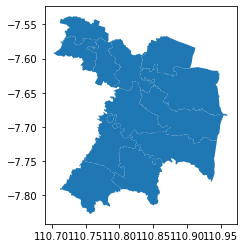

In [4]:
# plot peta sukoharjo

kab_sukoharjo.plot()

<AxesSubplot:>

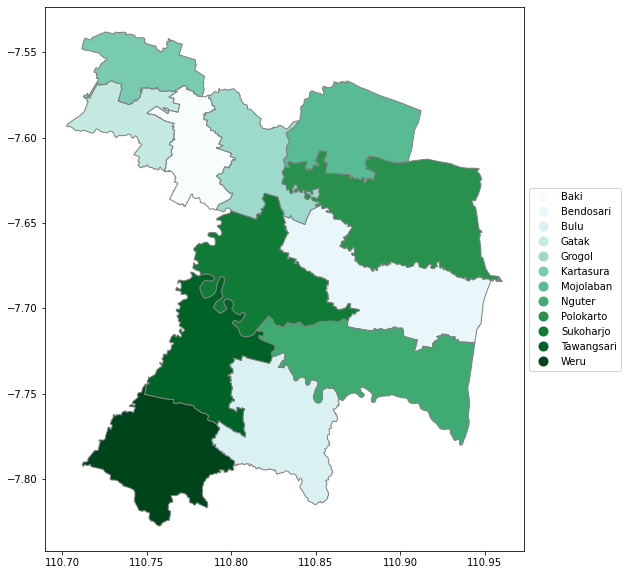

In [5]:
# Visualisasi data berdasarkan kecamatan

kab_sukoharjo.plot(column='kecamatan', cmap='BuGn', figsize=(10,10), categorical=True, legend=True,edgecolor='grey' ,legend_kwds={'loc':'center left','bbox_to_anchor':(1,0.5)})

In [6]:
# membaca file .csv

df = pd.read_csv('dataSukoharjo1.csv', sep=';')
df

,kecamatan,penduduk,laju_pertumbuhan,banjir,banyak_hujan,hari_hujan,ketinggian,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020
0,Weru,54695,"3,64",2,1996,117,107,1180,1179,1179,"1305,26"
1,Bulu,34104,"14,3",0,1590,86,114,632,630,629,"777,56"
2,Tawangsari,52538,"2,26",2,1668,85,102,1201,1199,1198,"1314,11"
3,Sukoharjo,97020,"2,35",5,1417,71,95,2036,2042,2047,"2176,31"
4,Nguter,52309,"15,83",0,1701,102,104,765,763,762,"953,15"
5,Bendosari,61563,"10,19",0,1448,106,116,989,988,988,"1161,79"
6,Polokarto,83748,"6,18",0,1006,62,125,1212,1215,1218,"1346,86"
7,Mojolaban,96533,"4,11",4,2076,68,104,2675,2709,2742,"2716,18"
8,Grogol,128193,"-6,96",5,1799,101,89,4622,4668,4714,"4273,1"
9,Baki,76422,"3,59",0,1689,91,105,3707,3794,3882,"3478,47"


In [7]:
# Cek Tipe Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   kecamatan               12 non-null     object
 1   penduduk                12 non-null     int64 
 2   laju_pertumbuhan        12 non-null     object
 3   banjir                  12 non-null     int64 
 4   banyak_hujan            12 non-null     int64 
 5   hari_hujan              12 non-null     int64 
 6   ketinggian              12 non-null     int64 
 7   kepadatan_penduduk2017  12 non-null     int64 
 8   kepadatan_penduduk2018  12 non-null     int64 
 9   kepadatan_penduduk2019  12 non-null     int64 
 10  kepadatan_penduduk2020  12 non-null     object
dtypes: int64(8), object(3)
memory usage: 1.2+ KB


In [8]:
# Ubah Comma ke dot dalam kepadatan penduduk

commaDatas = ['kepadatan_penduduk2020']
for commaData in commaDatas:
    df[commaData] = [x.replace(',', '.') for x in df[commaData]]
df

,kecamatan,penduduk,laju_pertumbuhan,banjir,banyak_hujan,hari_hujan,ketinggian,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020
0,Weru,54695,"3,64",2,1996,117,107,1180,1179,1179,1305.26
1,Bulu,34104,"14,3",0,1590,86,114,632,630,629,777.56
2,Tawangsari,52538,"2,26",2,1668,85,102,1201,1199,1198,1314.11
3,Sukoharjo,97020,"2,35",5,1417,71,95,2036,2042,2047,2176.31
4,Nguter,52309,"15,83",0,1701,102,104,765,763,762,953.15
5,Bendosari,61563,"10,19",0,1448,106,116,989,988,988,1161.79
6,Polokarto,83748,"6,18",0,1006,62,125,1212,1215,1218,1346.86
7,Mojolaban,96533,"4,11",4,2076,68,104,2675,2709,2742,2716.18
8,Grogol,128193,"-6,96",5,1799,101,89,4622,4668,4714,4273.1
9,Baki,76422,"3,59",0,1689,91,105,3707,3794,3882,3478.47


In [9]:
# merubah tipe data menjadi float

datas = ['kepadatan_penduduk2017','kepadatan_penduduk2018','kepadatan_penduduk2019','kepadatan_penduduk2020']
for data in datas:
    df[data] = df[data].astype(float)
df

,kecamatan,penduduk,laju_pertumbuhan,banjir,banyak_hujan,hari_hujan,ketinggian,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020
0,Weru,54695,"3,64",2,1996,117,107,1180.0,1179.0,1179.0,1305.26
1,Bulu,34104,"14,3",0,1590,86,114,632.0,630.0,629.0,777.56
2,Tawangsari,52538,"2,26",2,1668,85,102,1201.0,1199.0,1198.0,1314.11
3,Sukoharjo,97020,"2,35",5,1417,71,95,2036.0,2042.0,2047.0,2176.31
4,Nguter,52309,"15,83",0,1701,102,104,765.0,763.0,762.0,953.15
5,Bendosari,61563,"10,19",0,1448,106,116,989.0,988.0,988.0,1161.79
6,Polokarto,83748,"6,18",0,1006,62,125,1212.0,1215.0,1218.0,1346.86
7,Mojolaban,96533,"4,11",4,2076,68,104,2675.0,2709.0,2742.0,2716.18
8,Grogol,128193,"-6,96",5,1799,101,89,4622.0,4668.0,4714.0,4273.10
9,Baki,76422,"3,59",0,1689,91,105,3707.0,3794.0,3882.0,3478.47


In [10]:
# Cek Tipe data lagi

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kecamatan               12 non-null     object 
 1   penduduk                12 non-null     int64  
 2   laju_pertumbuhan        12 non-null     object 
 3   banjir                  12 non-null     int64  
 4   banyak_hujan            12 non-null     int64  
 5   hari_hujan              12 non-null     int64  
 6   ketinggian              12 non-null     int64  
 7   kepadatan_penduduk2017  12 non-null     float64
 8   kepadatan_penduduk2018  12 non-null     float64
 9   kepadatan_penduduk2019  12 non-null     float64
 10  kepadatan_penduduk2020  12 non-null     float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1.2+ KB


In [11]:
# menggabungkan data 

kab_sukoharjo_merged = kab_sukoharjo.merge(df, on="kecamatan")
kab_sukoharjo_merged.head()

,provinsi,kabupaten,kecamatan,kode_dagri,geometry,penduduk,laju_pertumbuhan,banjir,banyak_hujan,hari_hujan,ketinggian,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020
0,JAWA TENGAH,SUKOHARJO,Baki,331110,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570...",76422,"3,59",0,1689,91,105,3707.0,3794.0,3882.0,3478.47
1,JAWA TENGAH,SUKOHARJO,Bendosari,331106,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640...",61563,"10,19",0,1448,106,116,989.0,988.0,988.0,1161.79
2,JAWA TENGAH,SUKOHARJO,Bulu,331102,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728...",34104,"14,3",0,1590,86,114,632.0,630.0,629.0,777.56
3,JAWA TENGAH,SUKOHARJO,Gatak,331111,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567...",54309,"8,54",2,1913,99,118,2506.0,2519.0,2535.0,2789.37
4,JAWA TENGAH,SUKOHARJO,Grogol,331109,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572...",128193,"-6,96",5,1799,101,89,4622.0,4668.0,4714.0,4273.10


In [12]:
# Menghapus kolom yang tidak diperlukan

cleansing = ['provinsi', 'kode_dagri', 'penduduk', 'laju_pertumbuhan', 'banjir', 'banyak_hujan', 'hari_hujan', 'ketinggian']
kab_sukoharjo_merged.drop(cleansing, inplace=True, axis=1)
kab_backup = kab_sukoharjo_merged

kab_sukoharjo_merged.head()

,kabupaten,kecamatan,geometry,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020
0,SUKOHARJO,Baki,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570...",3707.0,3794.0,3882.0,3478.47
1,SUKOHARJO,Bendosari,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640...",989.0,988.0,988.0,1161.79
2,SUKOHARJO,Bulu,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728...",632.0,630.0,629.0,777.56
3,SUKOHARJO,Gatak,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567...",2506.0,2519.0,2535.0,2789.37
4,SUKOHARJO,Grogol,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572...",4622.0,4668.0,4714.0,4273.10


### Visualisasi data kepadatan penduduk

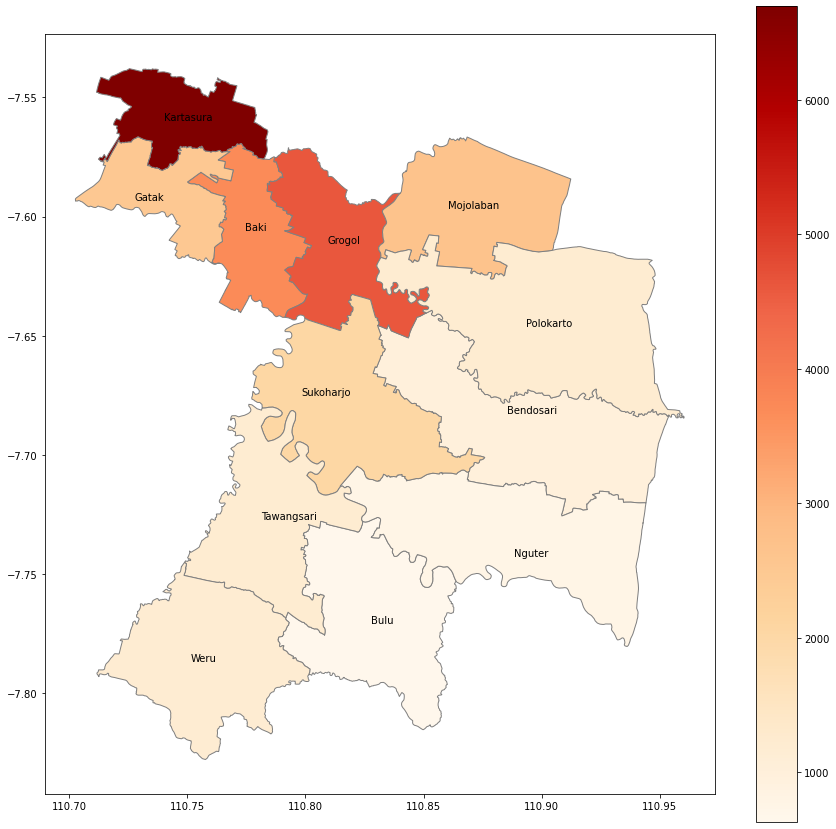

In [13]:
#Visualisasi Data Kepadatan penduduk 2017

kab_sukoharjo_merged['coords'] = kab_sukoharjo_merged['geometry'].apply(lambda x:x.representative_point().coords[:])
kab_sukoharjo_merged['coords'] = [coords[0] for coords in kab_sukoharjo_merged['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab_sukoharjo_merged.plot(ax=ax, column='kepadatan_penduduk2017', edgecolor='grey',cmap='OrRd', legend=True)
                 
for idx, row in kab_sukoharjo_merged.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

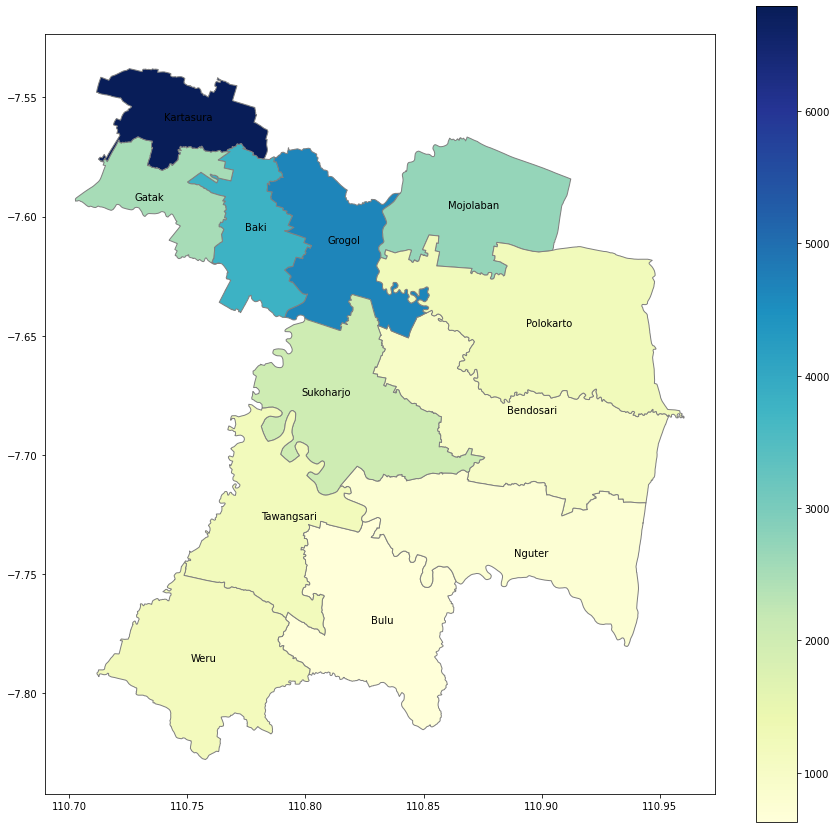

In [14]:
#Visualisasi Data Kepadatan penduduk 2018

kab_sukoharjo_merged['coords'] = kab_sukoharjo_merged['geometry'].apply(lambda x:x.representative_point().coords[:])
kab_sukoharjo_merged['coords'] = [coords[0] for coords in kab_sukoharjo_merged['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab_sukoharjo_merged.plot(ax=ax, column='kepadatan_penduduk2018', edgecolor='grey',cmap='YlGnBu', legend=True)
                 
for idx, row in kab_sukoharjo_merged.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

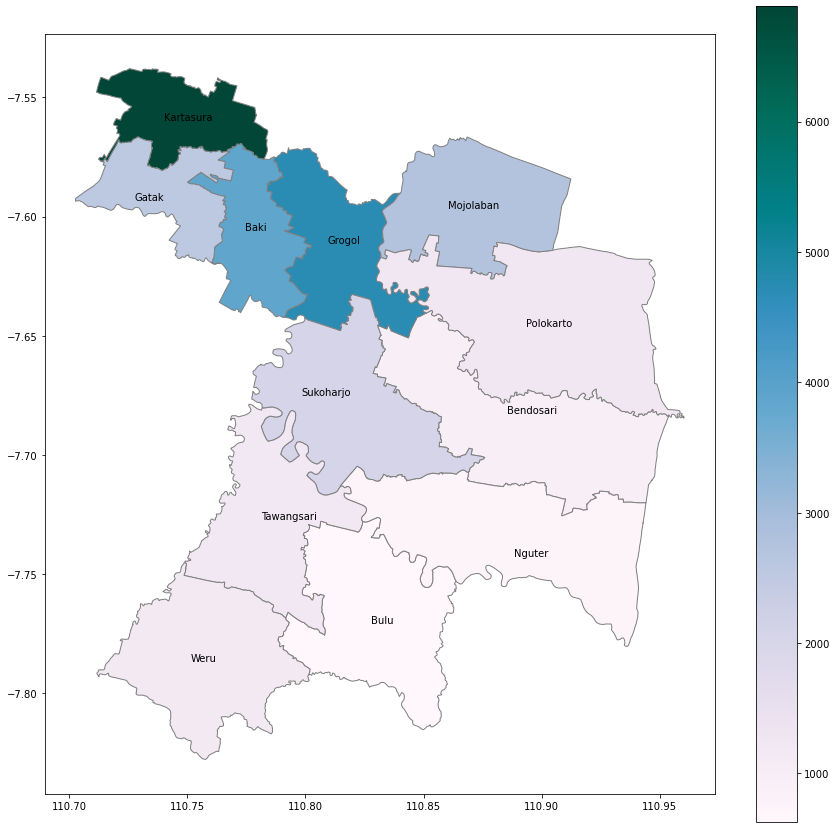

In [15]:
#Visualisasi Data Kepadatan penduduk 2019

kab_sukoharjo_merged['coords'] = kab_sukoharjo_merged['geometry'].apply(lambda x:x.representative_point().coords[:])
kab_sukoharjo_merged['coords'] = [coords[0] for coords in kab_sukoharjo_merged['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab_sukoharjo_merged.plot(ax=ax, column='kepadatan_penduduk2019', edgecolor='grey',cmap='PuBuGn', legend=True)
                 
for idx, row in kab_sukoharjo_merged.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

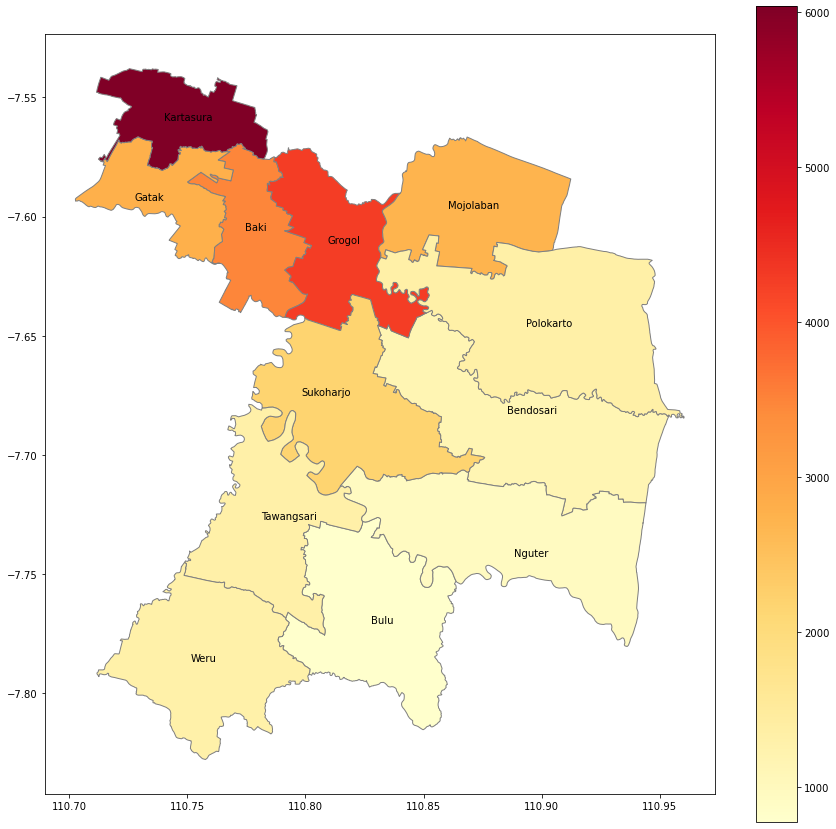

In [16]:
#Visualisasi Data Kepadatan penduduk 2020

kab_sukoharjo_merged['coords'] = kab_sukoharjo_merged['geometry'].apply(lambda x:x.representative_point().coords[:])
kab_sukoharjo_merged['coords'] = [coords[0] for coords in kab_sukoharjo_merged['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab_sukoharjo_merged.plot(ax=ax, column='kepadatan_penduduk2020', edgecolor='grey',cmap='YlOrRd', legend=True)
                 
for idx, row in kab_sukoharjo_merged.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

### Melakukan prediksi

In [17]:
# tampung data dalam var kab

kab = kab_sukoharjo_merged
kab

,kabupaten,kecamatan,geometry,kepadatan_penduduk2017,kepadatan_penduduk2018,kepadatan_penduduk2019,kepadatan_penduduk2020,coords
0,SUKOHARJO,Baki,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570...",3707.0,3794.0,3882.0,3478.47,"(110.77904934189382, -7.605790684742137)"
1,SUKOHARJO,Bendosari,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640...",989.0,988.0,988.0,1161.79,"(110.895961792263, -7.68245307060253)"
2,SUKOHARJO,Bulu,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728...",632.0,630.0,629.0,777.56,"(110.83269275367066, -7.770664411233436)"
3,SUKOHARJO,Gatak,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567...",2506.0,2519.0,2535.0,2789.37,"(110.73388788111762, -7.593204174482898)"
4,SUKOHARJO,Grogol,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572...",4622.0,4668.0,4714.0,4273.10,"(110.81628606014675, -7.611032886458408)"
5,SUKOHARJO,Kartasura,"POLYGON ((110.73044 -7.53913, 110.73085 -7.539...",6696.0,6790.0,6884.0,6035.00,"(110.75021368381636, -7.55939575261177)"
6,SUKOHARJO,Mojolaban,"POLYGON ((110.87196 -7.56823, 110.87216 -7.568...",2675.0,2709.0,2742.0,2716.18,"(110.87101901673617, -7.5964377075839975)"
7,SUKOHARJO,Nguter,"POLYGON ((110.83023 -7.71091, 110.83055 -7.710...",765.0,763.0,762.0,953.15,"(110.8953401737418, -7.7425030829507415)"
8,SUKOHARJO,Polokarto,"POLYGON ((110.85641 -7.60815, 110.85619 -7.611...",1212.0,1215.0,1218.0,1346.86,"(110.9030155691422, -7.64615855477328)"
9,SUKOHARJO,Sukoharjo,"POLYGON ((110.82750 -7.63485, 110.82760 -7.635...",2036.0,2042.0,2047.0,2176.31,"(110.80893878248003, -7.674735636939917)"


In [18]:
# mengubah nama kolom

kab.rename(columns = {'kepadatan_penduduk2017':'2017','kepadatan_penduduk2018':'2018','kepadatan_penduduk2019':'2019','kepadatan_penduduk2020':'2020'}, inplace = True)
kab = kab.T
kab= kab.reset_index().rename(columns={'index':'columnName'})

kab

,columnName,0,1,2,3,4,5,6,7,8,9,10,11
0,kabupaten,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO,SUKOHARJO
1,kecamatan,Baki,Bendosari,Bulu,Gatak,Grogol,Kartasura,Mojolaban,Nguter,Polokarto,Sukoharjo,Tawangsari,Weru
2,geometry,POLYGON ((110.77304312194276 -7.56956227268059...,POLYGON ((110.85380597026958 -7.64009503235973...,POLYGON ((110.83178396555778 -7.72742665211813...,POLYGON ((110.73058999972896 -7.56724000012580...,POLYGON ((110.79317058515461 -7.57214167489818...,POLYGON ((110.73043857368144 -7.53913364110456...,POLYGON ((110.87195642235125 -7.56822790359478...,POLYGON ((110.83022992806895 -7.71091100204099...,POLYGON ((110.85640648137425 -7.60815185972038...,POLYGON ((110.82750057379268 -7.63484966458022...,POLYGON ((110.78036315373681 -7.68086888019451...,POLYGON ((110.74945387679523 -7.74666080615109...
3,2017,3707.0,989.0,632.0,2506.0,4622.0,6696.0,2675.0,765.0,1212.0,2036.0,1201.0,1180.0
4,2018,3794.0,988.0,630.0,2519.0,4668.0,6790.0,2709.0,763.0,1215.0,2042.0,1199.0,1179.0
5,2019,3882.0,988.0,629.0,2535.0,4714.0,6884.0,2742.0,762.0,1218.0,2047.0,1198.0,1179.0
6,2020,3478.47,1161.79,777.56,2789.37,4273.1,6035.0,2716.18,953.15,1346.86,2176.31,1314.11,1305.26
7,coords,"(110.77904934189382, -7.605790684742137)","(110.895961792263, -7.68245307060253)","(110.83269275367066, -7.770664411233436)","(110.73388788111762, -7.593204174482898)","(110.81628606014675, -7.611032886458408)","(110.75021368381636, -7.55939575261177)","(110.87101901673617, -7.5964377075839975)","(110.8953401737418, -7.7425030829507415)","(110.9030155691422, -7.64615855477328)","(110.80893878248003, -7.674735636939917)","(110.7928435843819, -7.727128734153616)","(110.75675212426603, -7.786338268446186)"


In [19]:
# Tes Prediksi Kecamatan Baki

x = kab.iloc[3:7,0].values.reshape(-1,1)
y = kab.iloc[3:7,1].values.reshape(-1,1)
model = linear_model.LinearRegression().fit(x,y)
predict = model.predict([[2021]])
predict

array([[3565.97]])

In [20]:
# Prediksi semua kecamatan 2021

predictions_2021 = [] 
for z in range(1,13):
    x = kab.iloc[3:7,0].values.reshape(-1,1)
    y = kab.iloc[3:7,z].values.reshape(-1,1)
    model = linear_model.LinearRegression().fit(x,y)
    predictions_2021.append("%.2f"% (model.predict([[2021]])[0][0]))
predictions_2021

['3565.97',
 '1161.29',
 '776.06',
 '2803.87',
 '4319.10',
 '6129.00',
 '2749.68',
 '951.65',
 '1349.86',
 '2181.81',
 '1312.61',
 '1304.76']

In [21]:
# Prediksi semua kecamatan 2022

predictions_2022 = [] 
for z in range(1,13):
    x = kab.iloc[3:7,0].values.reshape(-1,1)
    y = kab.iloc[3:7,z].values.reshape(-1,1)
    model = linear_model.LinearRegression().fit(x,y)
    predictions_2022.append("%.2f"% (model.predict([[2022]])[0][0]))
predictions_2022

['3506.21',
 '1213.13',
 '819.63',
 '2890.48',
 '4219.03',
 '5940.10',
 '2765.33',
 '1008.00',
 '1390.62',
 '2224.40',
 '1346.44',
 '1342.34']

In [22]:
kab = kab_backup
kab

,kabupaten,kecamatan,geometry,2017,2018,2019,2020,coords
0,SUKOHARJO,Baki,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570...",3707.0,3794.0,3882.0,3478.47,"(110.77904934189382, -7.605790684742137)"
1,SUKOHARJO,Bendosari,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640...",989.0,988.0,988.0,1161.79,"(110.895961792263, -7.68245307060253)"
2,SUKOHARJO,Bulu,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728...",632.0,630.0,629.0,777.56,"(110.83269275367066, -7.770664411233436)"
3,SUKOHARJO,Gatak,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567...",2506.0,2519.0,2535.0,2789.37,"(110.73388788111762, -7.593204174482898)"
4,SUKOHARJO,Grogol,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572...",4622.0,4668.0,4714.0,4273.10,"(110.81628606014675, -7.611032886458408)"
5,SUKOHARJO,Kartasura,"POLYGON ((110.73044 -7.53913, 110.73085 -7.539...",6696.0,6790.0,6884.0,6035.00,"(110.75021368381636, -7.55939575261177)"
6,SUKOHARJO,Mojolaban,"POLYGON ((110.87196 -7.56823, 110.87216 -7.568...",2675.0,2709.0,2742.0,2716.18,"(110.87101901673617, -7.5964377075839975)"
7,SUKOHARJO,Nguter,"POLYGON ((110.83023 -7.71091, 110.83055 -7.710...",765.0,763.0,762.0,953.15,"(110.8953401737418, -7.7425030829507415)"
8,SUKOHARJO,Polokarto,"POLYGON ((110.85641 -7.60815, 110.85619 -7.611...",1212.0,1215.0,1218.0,1346.86,"(110.9030155691422, -7.64615855477328)"
9,SUKOHARJO,Sukoharjo,"POLYGON ((110.82750 -7.63485, 110.82760 -7.635...",2036.0,2042.0,2047.0,2176.31,"(110.80893878248003, -7.674735636939917)"


In [23]:
# Masukkan kolom baru dengan isian prediksi sebelumnya

kab['2021'] = predictions_2021
kab['2022'] = predictions_2022
kab

,kabupaten,kecamatan,geometry,2017,2018,2019,2020,coords,2021,2022
0,SUKOHARJO,Baki,"POLYGON ((110.77304 -7.56956, 110.77340 -7.570...",3707.0,3794.0,3882.0,3478.47,"(110.77904934189382, -7.605790684742137)",3565.97,3506.21
1,SUKOHARJO,Bendosari,"POLYGON ((110.85381 -7.64010, 110.85353 -7.640...",989.0,988.0,988.0,1161.79,"(110.895961792263, -7.68245307060253)",1161.29,1213.13
2,SUKOHARJO,Bulu,"POLYGON ((110.83178 -7.72743, 110.83162 -7.728...",632.0,630.0,629.0,777.56,"(110.83269275367066, -7.770664411233436)",776.06,819.63
3,SUKOHARJO,Gatak,"POLYGON ((110.73059 -7.56724, 110.73062 -7.567...",2506.0,2519.0,2535.0,2789.37,"(110.73388788111762, -7.593204174482898)",2803.87,2890.48
4,SUKOHARJO,Grogol,"POLYGON ((110.79317 -7.57214, 110.79336 -7.572...",4622.0,4668.0,4714.0,4273.10,"(110.81628606014675, -7.611032886458408)",4319.10,4219.03
5,SUKOHARJO,Kartasura,"POLYGON ((110.73044 -7.53913, 110.73085 -7.539...",6696.0,6790.0,6884.0,6035.00,"(110.75021368381636, -7.55939575261177)",6129.00,5940.10
6,SUKOHARJO,Mojolaban,"POLYGON ((110.87196 -7.56823, 110.87216 -7.568...",2675.0,2709.0,2742.0,2716.18,"(110.87101901673617, -7.5964377075839975)",2749.68,2765.33
7,SUKOHARJO,Nguter,"POLYGON ((110.83023 -7.71091, 110.83055 -7.710...",765.0,763.0,762.0,953.15,"(110.8953401737418, -7.7425030829507415)",951.65,1008.00
8,SUKOHARJO,Polokarto,"POLYGON ((110.85641 -7.60815, 110.85619 -7.611...",1212.0,1215.0,1218.0,1346.86,"(110.9030155691422, -7.64615855477328)",1349.86,1390.62
9,SUKOHARJO,Sukoharjo,"POLYGON ((110.82750 -7.63485, 110.82760 -7.635...",2036.0,2042.0,2047.0,2176.31,"(110.80893878248003, -7.674735636939917)",2181.81,2224.40


In [24]:
# Cek Type Columns

kab.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   kabupaten  12 non-null     object  
 1   kecamatan  12 non-null     object  
 2   geometry   12 non-null     geometry
 3   2017       12 non-null     float64 
 4   2018       12 non-null     float64 
 5   2019       12 non-null     float64 
 6   2020       12 non-null     float64 
 7   coords     12 non-null     object  
 8   2021       12 non-null     object  
 9   2022       12 non-null     object  
dtypes: float64(4), geometry(1), object(5)
memory usage: 1.3+ KB


In [25]:
# Ubah data 2021 dan 2022 menjadi float

kab['2021'] = kab['2021'].astype(float)
kab['2022'] = kab['2022'].astype(float)
kab.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   kabupaten  12 non-null     object  
 1   kecamatan  12 non-null     object  
 2   geometry   12 non-null     geometry
 3   2017       12 non-null     float64 
 4   2018       12 non-null     float64 
 5   2019       12 non-null     float64 
 6   2020       12 non-null     float64 
 7   coords     12 non-null     object  
 8   2021       12 non-null     float64 
 9   2022       12 non-null     float64 
dtypes: float64(6), geometry(1), object(3)
memory usage: 1.3+ KB


### Visualisasi hasil prediksi

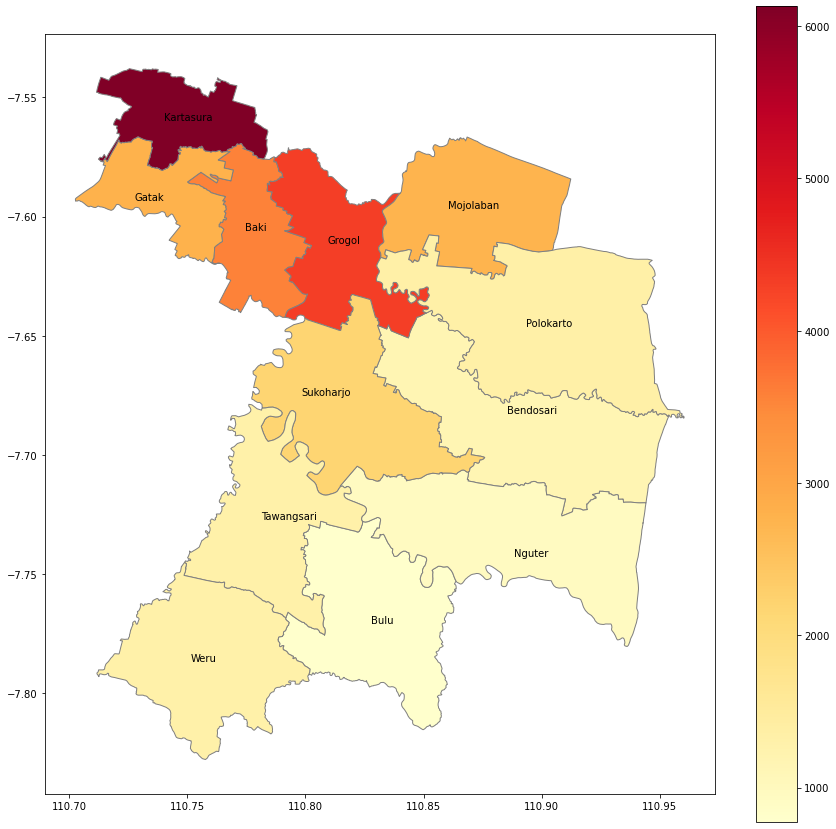

In [26]:
#Visualisasi Data Kepadatan penduduk 2021

kab['coords'] = kab['geometry'].apply(lambda x:x.representative_point().coords[:])
kab['coords'] = [coords[0] for coords in kab['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab.plot(ax=ax, column='2021', edgecolor='grey',cmap='YlOrRd', legend=True)
                 
for idx, row in kab.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

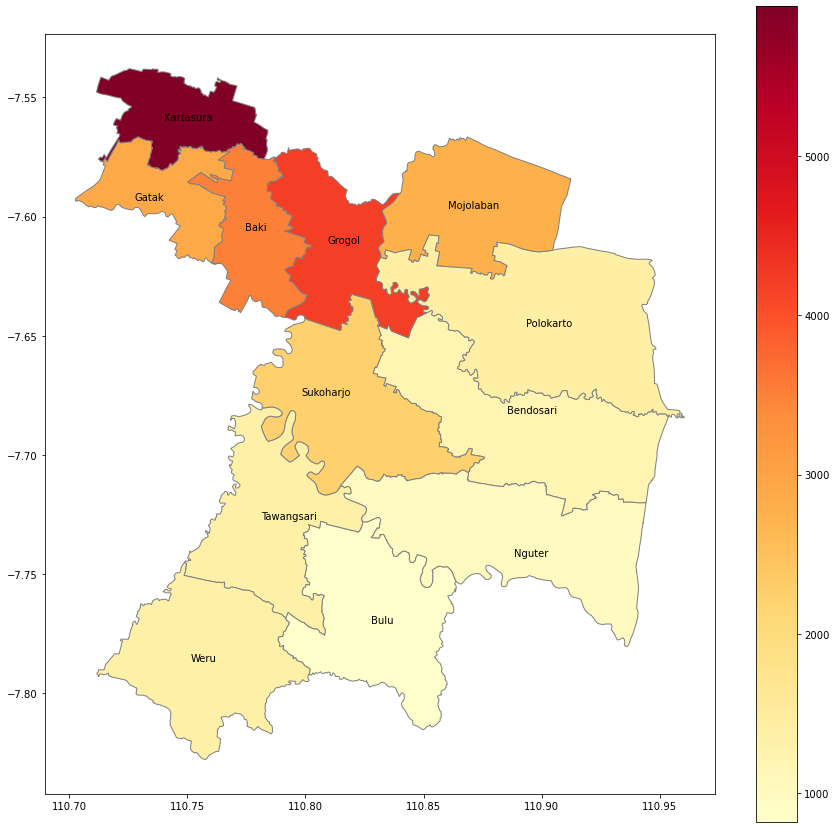

In [27]:
#Visualisasi Data Kepadatan penduduk 2022

kab['coords'] = kab['geometry'].apply(lambda x:x.representative_point().coords[:])
kab['coords'] = [coords[0] for coords in kab['coords']]

fig, ax = plt.subplots(figsize = (15,15))
kab.plot(ax=ax, column='2022', edgecolor='grey',cmap='YlOrRd', legend=True)
                 
for idx, row in kab.iterrows():
    plt.annotate(text=row['kecamatan'], xy = row['coords'], horizontalalignment='center', color='black')

In [28]:
# visualisasi peta interaktif kepadatan penduduk 2021

kab.explore(column="2021", # make choropleth based on "BoroName" column
     tooltip="kecamatan", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="YlOrRd", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
)

In [29]:
# visualisasi peta interaktif kepadatan penduduk 2022

kab.explore(column="2022", # make choropleth based on "BoroName" column
     tooltip="kecamatan", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="YlOrRd", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
)